<a href="https://colab.research.google.com/github/Krykiet/TF_training/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Neural Networks in TF

Simplified: predicting a number based on other numbers

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating some data to view and fit

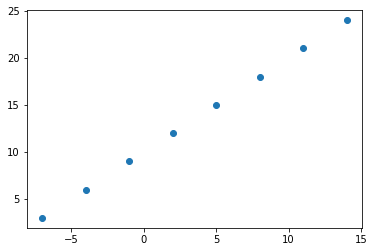

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

Shapes will vary depending on the problem

In [4]:
# Create a demo tensor for price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape= X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

These are scalars, rank 0 tensors - no shape

In [6]:
X[0].ndim

0

In [7]:
X_reshaped = X.reshape(-1, 1)
X_reshaped, X_reshaped.ndim

(array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]]), 2)

In [8]:
# Turn NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

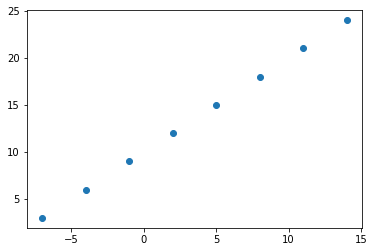

In [10]:
plt.scatter(X, y)

## Steps in modellling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a mode**l - define the loss function (how wrong the model is) and optimizer (tells model how to improve the patters its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error 
              optimizer=tf.keras.optimizers.SGD(), # SGD = stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 753ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/200
1/1 [==============================] - 0s 15ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/200
1/1 [==============================] - 0s 34ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/200
1/1 [==============================] - 0s 14ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/200
1/1 [==============================] - 

In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Make a prediction
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 352ms/step


In [14]:
y_pred

array([[30.908516]], dtype=float32)

## Improving model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we can add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we can change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for morem **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [15]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.optimizers.SGD(),
              metrics=(["mae"]))

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=300, verbose=2)

Epoch 1/300
1/1 - 1s - loss: 16.1154 - mae: 16.1154 - 1s/epoch - 1s/step
Epoch 2/300
1/1 - 0s - loss: 14.9561 - mae: 14.9561 - 12ms/epoch - 12ms/step
Epoch 3/300
1/1 - 0s - loss: 14.5171 - mae: 14.5171 - 8ms/epoch - 8ms/step
Epoch 4/300
1/1 - 0s - loss: 14.1221 - mae: 14.1221 - 18ms/epoch - 18ms/step
Epoch 5/300
1/1 - 0s - loss: 13.7527 - mae: 13.7527 - 15ms/epoch - 15ms/step
Epoch 6/300
1/1 - 0s - loss: 13.3933 - mae: 13.3933 - 13ms/epoch - 13ms/step
Epoch 7/300
1/1 - 0s - loss: 13.0296 - mae: 13.0296 - 15ms/epoch - 15ms/step
Epoch 8/300
1/1 - 0s - loss: 12.6469 - mae: 12.6469 - 8ms/epoch - 8ms/step
Epoch 9/300
1/1 - 0s - loss: 12.2295 - mae: 12.2295 - 14ms/epoch - 14ms/step
Epoch 10/300
1/1 - 0s - loss: 11.7585 - mae: 11.7585 - 34ms/epoch - 34ms/step
Epoch 11/300
1/1 - 0s - loss: 11.2105 - mae: 11.2105 - 25ms/epoch - 25ms/step
Epoch 12/300
1/1 - 0s - loss: 10.5546 - mae: 10.5546 - 25ms/epoch - 25ms/step
Epoch 13/300
1/1 - 0s - loss: 9.7485 - mae: 9.7485 - 25ms/epoch - 25ms/step
Epoch

In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
X_expanded = tf.expand_dims(X, axis=1)
X_expanded2 = tf.expand_dims(X, axis=-1)
X_expanded == X_expanded2

<tf.Tensor: shape=(8, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [18]:
X, X_expanded, X_expanded2

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>)

In [19]:
X.shape, X_expanded.shape

(TensorShape([8]), TensorShape([8, 1]))

In [20]:
model.predict([1])

1/1 [==============================] - 0s 245ms/step


array([[11.8686]], dtype=float32)

In [21]:
model.predict([10])

1/1 [==============================] - 0s 73ms/step


array([[23.240662]], dtype=float32)

In [22]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_improved = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_improved.compile(loss="mae",
              optimizer=tf.optimizers.SGD(),
              metrics=(["mae"]))

# 3. Fit the model
model_improved.fit(tf.expand_dims(X, axis=-1), y, epochs=300, verbose=2)

Epoch 1/300
1/1 - 1s - loss: 13.2729 - mae: 13.2729 - 876ms/epoch - 876ms/step
Epoch 2/300
1/1 - 0s - loss: 13.0927 - mae: 13.0927 - 13ms/epoch - 13ms/step
Epoch 3/300
1/1 - 0s - loss: 12.9080 - mae: 12.9080 - 7ms/epoch - 7ms/step
Epoch 4/300
1/1 - 0s - loss: 12.7193 - mae: 12.7193 - 7ms/epoch - 7ms/step
Epoch 5/300
1/1 - 0s - loss: 12.5303 - mae: 12.5303 - 11ms/epoch - 11ms/step
Epoch 6/300
1/1 - 0s - loss: 12.3614 - mae: 12.3614 - 9ms/epoch - 9ms/step
Epoch 7/300
1/1 - 0s - loss: 12.2624 - mae: 12.2624 - 7ms/epoch - 7ms/step
Epoch 8/300
1/1 - 0s - loss: 12.1475 - mae: 12.1475 - 12ms/epoch - 12ms/step
Epoch 9/300
1/1 - 0s - loss: 12.0187 - mae: 12.0187 - 6ms/epoch - 6ms/step
Epoch 10/300
1/1 - 0s - loss: 11.8713 - mae: 11.8713 - 6ms/epoch - 6ms/step
Epoch 11/300
1/1 - 0s - loss: 11.6964 - mae: 11.6964 - 10ms/epoch - 10ms/step
Epoch 12/300
1/1 - 0s - loss: 11.4955 - mae: 11.4955 - 6ms/epoch - 6ms/step
Epoch 13/300
1/1 - 0s - loss: 11.2537 - mae: 11.2537 - 8ms/epoch - 8ms/step
Epoch 14/

In [23]:
# New model
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
# 2. Compile a model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 556ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2088 - mae: 12.2088
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.6861 - mae: 11.6861
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.1615 - mae: 11.1615
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6118 - mae: 10.6118
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0388 - mae: 10.0388
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 9.4399 - mae: 9.4399
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8100 - mae: 8.8100
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.1464 - mae: 8.1464
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4413 - mae: 7.4413
Epoch 11/100
1/1 [==============================] - 0s 9ms

In [24]:
# Check data

In [25]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
# Make a prediction

argument = tf.constant([17.0])

model.predict(argument)

1/1 [==============================] - 0s 68ms/step


array([[31.85688]], dtype=float32)

In [27]:
# New model
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1)
])
# 2. Compile a model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 13.4343 - mae: 13.4343
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 12.5038 - mae: 12.5038
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 11.8637 - mae: 11.8637
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3507 - mae: 11.3507
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7205 - mae: 10.7205
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 9.9413 - mae: 9.9413
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 8.9703 - mae: 8.9703
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.7648 - mae: 7.7648
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 6.4649 - mae: 6.4649
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 4.7645 - mae: 4.7645
Epoch 11/100
1/1 [==============================] - 0s 19ms/step - loss: 4.

In [28]:
arg = tf.constant([1.0])
model.predict(arg)

1/1 [==============================] - 0s 60ms/step


array([[11.306608]], dtype=float32)

In [29]:
# Optimal model
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 366ms/step - loss: 13.4281 - mae: 13.4281
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.4047 - mae: 12.4047
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3876 - mae: 11.3876
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3730 - mae: 10.3730
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.3564 - mae: 9.3564
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.3310 - mae: 8.3310
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.2892 - mae: 7.2892
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 6.7866 - mae: 6.7866
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3197 - mae: 7.3197
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.8987 - mae: 7.8987
Epoch 11/100
1/1 [==============================] - 0s 20ms/step - l

In [30]:
arg = tf.constant([17.0])
model.predict(arg)

1/1 [==============================] - 0s 46ms/step


array([[28.117695]], dtype=float32)

## Evalutaing a model

```
Build a model -> fit -> evaluate -> tweak -> fit -> evaluate -> tweak -> fit -> evaluate ...
```

Evaluation:
> Visualization

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learnms?
* The predictions of the model - how do the predictions of a model line up against the ground truth

In [31]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [35]:
# Make labels for the dataset
y = X + 10

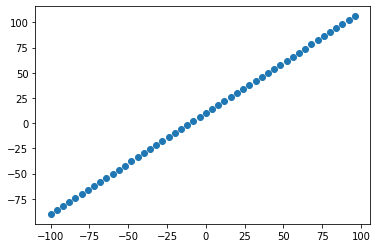

In [37]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

## The 3 sets:
**Training set** - model learns from this data, typically 70-80% of the available data

**Validation set** - model gets tuned/tweaked on this dataset, this is typically 10-15% of the data available

**Test set** - the model gets evaluated on this data to test what it has learned, typically 10-15% of available data


In [39]:
# Split the data into train and test sets
X_train = X[:40] # first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

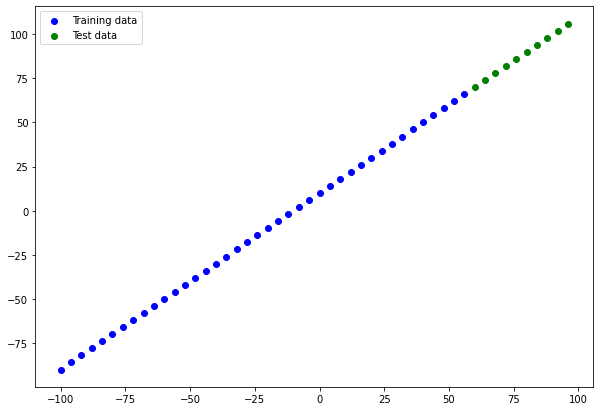

In [46]:
# Visualizing the data

plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Test data')
# Show a legent
plt.legend();

In [51]:
from numpy.core.fromnumeric import shape
# 1. Create a model (define input shape)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y, epochs=100)

TypeError: ignored

## Visualizing the model

In [53]:
# model.summary() - generates an error right now

In [157]:
# Let's create a model which builds automatically
tf.random.set_seed(42)

# 1. Create a model - input_shape is [1] - one number to predict one number (scalars)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you pring in already learn patters from other models during **transfer learning**)

In [158]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [159]:
arg = tf.constant([17])

model.predict(arg)

1/1 [==============================] - 0s 47ms/step


array([[21.23416]], dtype=float32)

In [160]:
# Get a summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


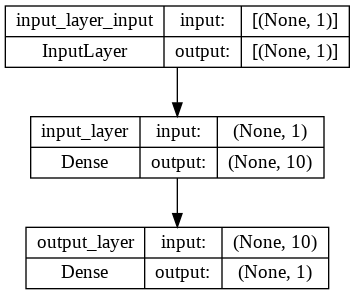

In [161]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing model predictions